Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 2.00.
Removido  {76%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {65%} suciedad vehiculo => Vehiculo-1 
Removido  {75%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Remo

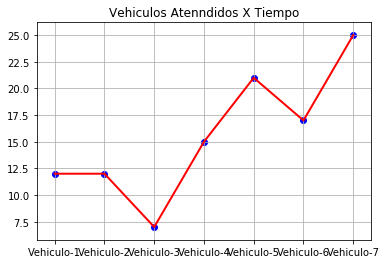

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {70%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {62%} suciedad vehiculo => Furgoneta-1 
Llega vehiculo: Furgoneta-4 a la hora 14.00.
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo 

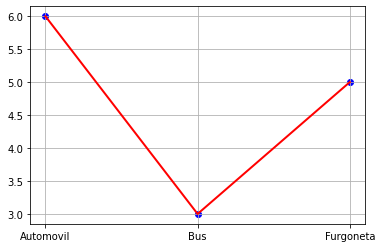

In [12]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


In [4]:
import simpy
import random
import matplotlib.pyplot as pp

NUM_HOSPITALES = 2
NUM_CAMAS=412; 
MAX_PACIENTES = 465
# Tiempo que tarda en atenderse un paciente en minutos
TIEMPO_ATENCION = 15
# Intervalo de tiempo en que llegan pacientes en minutos
INTERVALO_LLEGADA = 5
TIEMPO_SIMULACION = 200

tiempo={}
Pacientes_llegan={}
Pno={}

class Hospital(object):
    
    def __init__(self, environment, num_hospitales, tiempo_atencion, camas):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa los consultorios
        self.consultorios = simpy.Resource(environment, num_hospitales)
        
        self.camas = simpy.Resource(environment, camas)
        # Variable para el tiempo de atencion 
        self.tiempo_atencion = tiempo_atencion
        
    def atencion(self, paciente):
        yield self.env.timeout(random.randint(TIEMPO_ATENCION-2, TIEMPO_ATENCION+2))   
        print(chr(27)+"[0;30m"+paciente,' Atendido')
        
    def zona_aislamiento(self, paciente):
        t=random.randint(5, 20)
        rnd = random.randint(1,100)

        if rnd <= 90:
            yield self.env.timeout(t)
            print(chr(27)+"[0;33m"+'El ',paciente, 'Termina la Hospitalizacion en', t ,' Dias')
        else:
            yield self.env.timeout(t)
            print(chr(27)+"[1;30m"+'El ', paciente, 'Fallece a', t ,' Dias de Hospitalizacion')
        
        tiempo[paciente]=t
        
    
def llegada_paciente(env, nombre, hospital):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el paciente con el nombre pasado como parametro
    print(chr(27)+"[0;30m"+'Llega paciente: %s a la hora %.2f.' % (nombre, (env.now+420)/60))
    Pacientes_llegan[nombre]=((env.now+420)/60)
    
    # Especificamos que vamos a usar un recurso 
    with hospital.consultorios.request() as consultorio:
        yield consultorio
        print(chr(27)+"[0;30m"+'Entra paciente a atenderce: %s a la hora %.2f.' % (nombre, (env.now+420)/60))

        rnd = random.randint(1,100)
        if rnd <= 59: 
            yield env.process(hospital.atencion(nombre))
            print(chr(27)+"[0;32m"+'Paciente Sano [%s] Atendido a las %.2f.' % (nombre, (env.now+420)/60),"Casa")
            tiempo[nombre]=((env.now+420)/60)
            
        else:
            yield env.process(hospital.atencion(nombre))
            print(chr(27)+"[0;31m"+'Paciente Infectado [%s] Atendido a las %.2f.' % (nombre, (env.now+420)/60),"Internado")
            with hospital.camas.request() as cama:
                yield cama
                print('se le asigna a una cama: %s a la hora %.2f.' % (nombre, (env.now+420)/60))
                yield env.process(hospital.zona_aislamiento(nombre))     
        
    
def ejecutar(env, num_hospitales, tiempo_atencion, intervalo,camas):
    hospital=Hospital(env, num_hospitales, tiempo_atencion, camas)
    # llegada de pacientes iniciales
    for i in range(5):
        env.process(llegada_paciente(env, 'Paciente-%d'%(i+1),hospital))
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),hospital))

print('Hospital')
# Entorno de simulacion
env=simpy.Environment()
env.process(ejecutar(env, NUM_HOSPITALES, TIEMPO_ATENCION, INTERVALO_LLEGADA, NUM_CAMAS))

# Ejecucion de tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)
print("\n")
print(chr(27)+"[0;34m"+"Numero de pacientes :",len(Pacientes_llegan))
print(chr(27)+"[0;34m"+"Numero de pacientes Atendidos:",len(tiempo))
print(chr(27)+"[0;34m"+"Numero de pacientes se quedaron sin atender y fallecieron:",len(Pacientes_llegan)-len(tiempo))

Hospital
Llega paciente: Paciente-1 a la hora 7.00.
Llega paciente: Paciente-2 a la hora 7.00.
Llega paciente: Paciente-3 a la hora 7.00.
Llega paciente: Paciente-4 a la hora 7.00.
Llega paciente: Paciente-5 a la hora 7.00.
Entra paciente a atenderce: Paciente-1 a la hora 7.00.
Entra paciente a atenderce: Paciente-2 a la hora 7.00.
Llega paciente: Paciente-6 a la hora 7.13.
Llega paciente: Paciente-7 a la hora 7.22.
Paciente-1  Atendido
Paciente Sano [Paciente-1] Atendido a las 7.25. Casa
Entra paciente a atenderce: Paciente-3 a la hora 7.25.
Paciente-2  Atendido
Paciente Sano [Paciente-2] Atendido a las 7.27. Casa
Entra paciente a atenderce: Paciente-4 a la hora 7.27.
Llega paciente: Paciente-8 a la hora 7.28.
Llega paciente: Paciente-9 a la hora 7.32.
Llega paciente: Paciente-10 a la hora 7.43.
Paciente-4  Atendido
Paciente Sano [Paciente-4] Atendido a las 7.52. Casa
Entra paciente a atenderce: Paciente-5 a la hora 7.52.
Paciente-3  Atendido
Paciente Infectado [Paciente-3] Atendido a

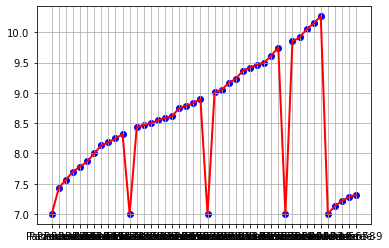

In [14]:

import simpy
import random
import matplotlib.pyplot as pp
#Grafica
datos=sorted(Pacientes_llegan.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()


In [3]:
!pip install simpy

## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 